Found 107 images
Batch size: 3


Infant age in months: 0


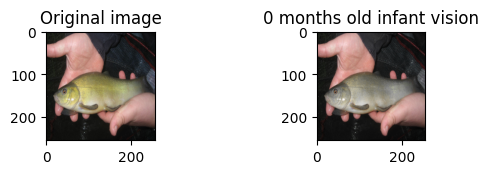

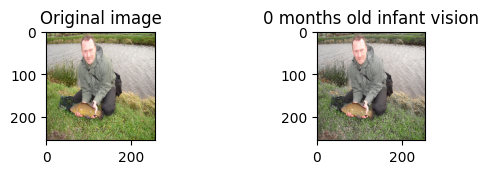

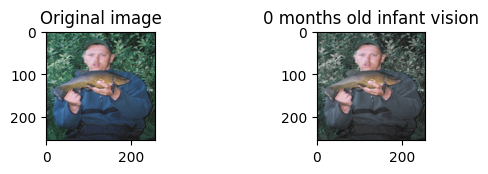

Average loading time: 12.61287792523702


Infant age in months: 1


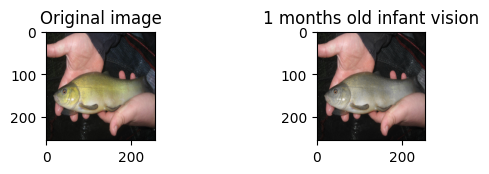

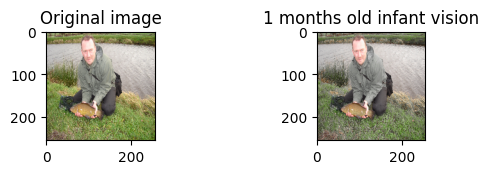

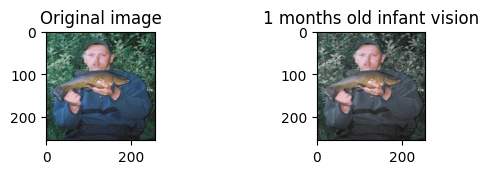

Average loading time: 12.859737316767374


Infant age in months: 2


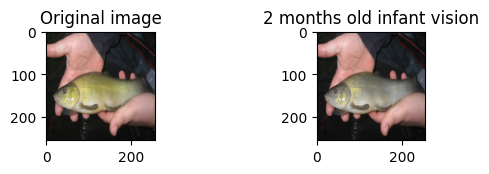

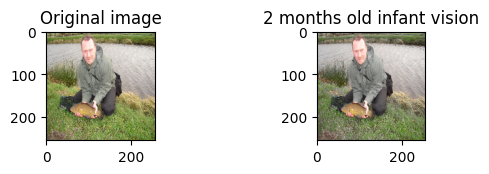

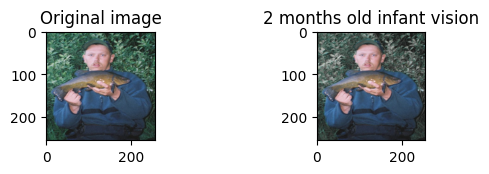

Average loading time: 12.007246812184652


Infant age in months: 3


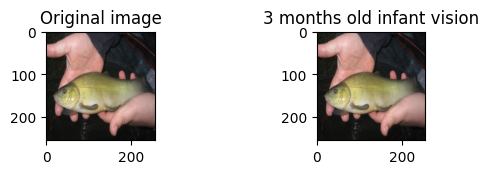

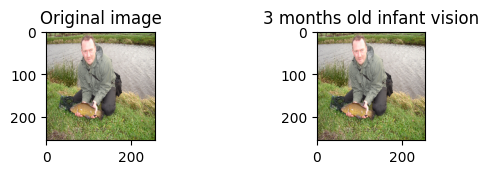

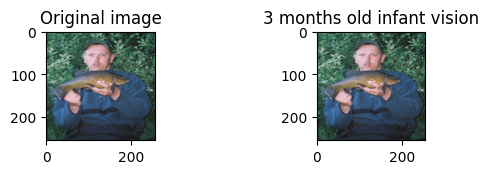

Average loading time: 0.8036255041758219


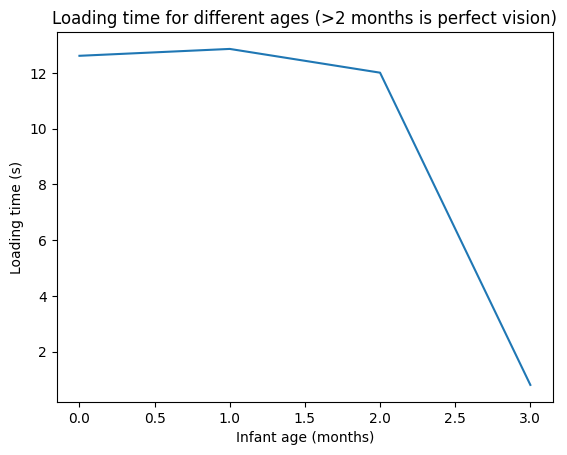

In [2]:
"""Script to debug dataloader
for different infant ages vs adult vision"""
import torch as t
from data_demo import CustomDataset
from matplotlib import pyplot as plt
import time

train_dataset = CustomDataset(data_type="jpeg", mode="train")
batch_size = 3
print("Batch size:", batch_size)
loading_times = []
for infant_age in range(4):
    train_dataset.infant_age = infant_age
    print("\n\nInfant age in months:", train_dataset.infant_age)

    train_dl = t.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        drop_last=True,
        shuffle=False,
        num_workers=1,
    )

    loading_start_time = time.time()
    (orig_x, x, y) = next(iter(train_dl))
    current_time = time.time()
    average_loading_time = (current_time - loading_start_time) / batch_size
    loading_times.append(average_loading_time)

    plt.figure()

    for i in range(batch_size):
        plt.subplot(3, 2, i*2 + 1).set_title("Original image")
        plt.imshow(orig_x[i].permute(1, 2, 0))
        plt.subplot(3, 2, i*2 + 2).set_title(
            f"{train_dataset.infant_age} months old infant vision"
        )
        plt.imshow(x[i].permute(1, 2, 0))
        plt.show()

    print("Average loading time:", average_loading_time)
plt.figure()
plt.plot(loading_times)
plt.title("Loading time for different ages (>2 months is perfect vision)")
plt.xlabel("Infant age (months)")
plt.ylabel("Loading time (s)")
plt.show()